# 2 Sample Kolmogorov - Smirnov (KS)

https://real-statistics.com/non-parametric-tests/goodness-of-fit-tests/two-sample-kolmogorov-smirnov-test/

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.DataFrame(data={'Age':['21-22','23-24','25-26','27-28','29-30','31-32','33-34','35-36','37-38','39-40'],
                          'Men':[4,11,5,7,0,5,9,13,20,6],
                          'Women':[7,4,1,11,12,4,2,4,8,9]})
data

,Age,Men,Women
0,21-22,4,7
1,23-24,11,4
2,25-26,5,1
3,27-28,7,11
4,29-30,0,12
5,31-32,5,4
6,33-34,9,2
7,35-36,13,4
8,37-38,20,8
9,39-40,6,9


In [36]:
data['Men_Cumulative_N'] = data['Men'].cumsum()
data['Women_Cumulative_N'] = data['Women'].cumsum()
data['Men_Cumulative_%'] = data['Men'].cumsum()/np.sum(data['Men'])
data['Women_Cumulative_%'] = data['Women'].cumsum()/np.sum(data['Women'])
data['Difference'] = np.abs(data['Men_Cumulative_%'] - data['Women_Cumulative_%'])
data

,Age,Men,Women,Men_Cumulative_N,Women_Cumulative_N,Men_Cumulative_%,Women_Cumulative_%,Difference
0,21-22,4,7,4,7,0.0500,0.112903,0.062903
1,23-24,11,4,15,11,0.1875,0.177419,0.010081
2,25-26,5,1,20,12,0.2500,0.193548,0.056452
3,27-28,7,11,27,23,0.3375,0.370968,0.033468
4,29-30,0,12,27,35,0.3375,0.564516,0.227016
5,31-32,5,4,32,39,0.4000,0.629032,0.229032
6,33-34,9,2,41,41,0.5125,0.661290,0.148790
7,35-36,13,4,54,45,0.6750,0.725806,0.050806
8,37-38,20,8,74,53,0.9250,0.854839,0.070161
9,39-40,6,9,80,62,1.0000,1.000000,0.000000


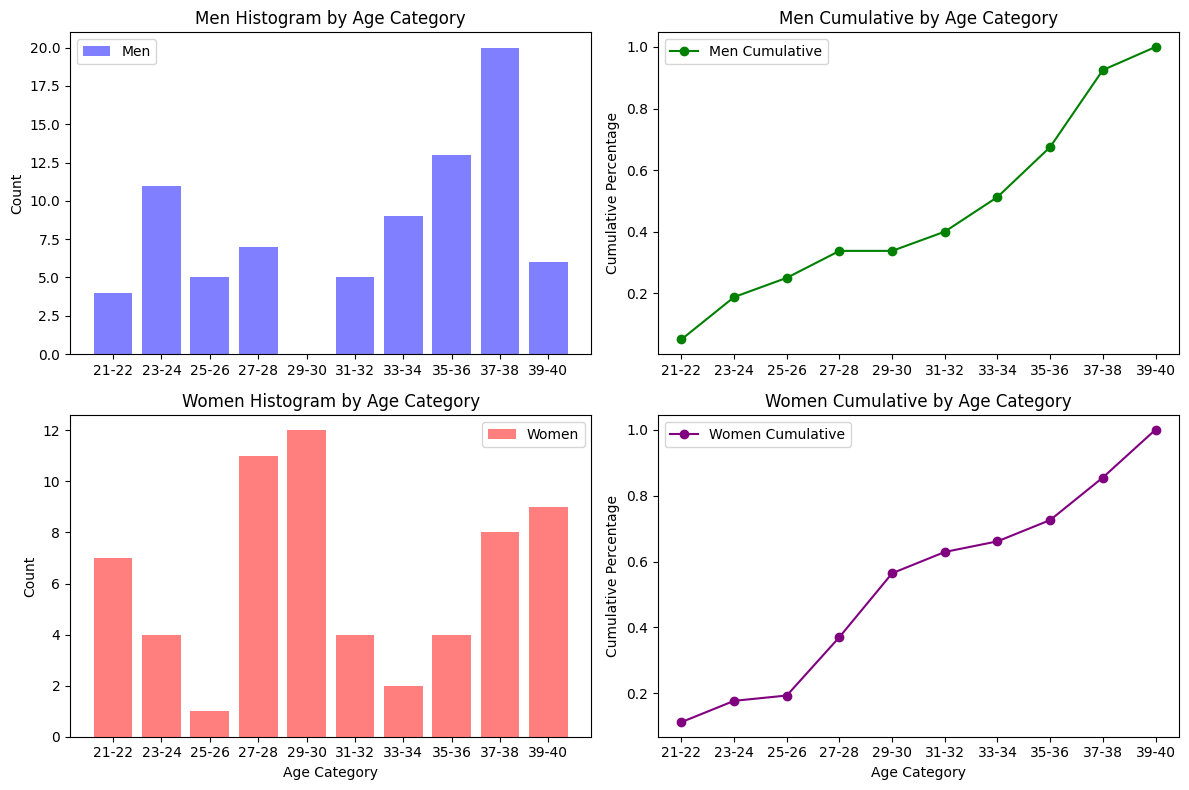

In [35]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot men's histogram on the first subplot of line 1
axes[0, 0].bar(data['Age'], data['Men'], alpha=0.5, label='Men', color='blue')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Men Histogram by Age Category')
axes[0, 0].legend()

# Plot men's cumulative line plot on the second subplot of line 1
axes[0, 1].plot(data['Age'], data['Men_Cumulative_%'], marker='o', label='Men Cumulative', color='green')
axes[0, 1].set_ylabel('Cumulative Percentage')
axes[0, 1].set_title('Men Cumulative by Age Category')
axes[0, 1].legend()

# Plot women's histogram on the first subplot of line 2
axes[1, 0].bar(data['Age'], data['Women'], alpha=0.5, label='Women', color='red')
axes[1, 0].set_xlabel('Age Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Women Histogram by Age Category')
axes[1, 0].legend()

# Plot women's cumulative line plot on the second subplot of line 2
axes[1, 1].plot(data['Age'], data['Women_Cumulative_%'], marker='o', label='Women Cumulative', color='purple')
axes[1, 1].set_xlabel('Age Category')
axes[1, 1].set_ylabel('Cumulative Percentage')
axes[1, 1].set_title('Women Cumulative by Age Category')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

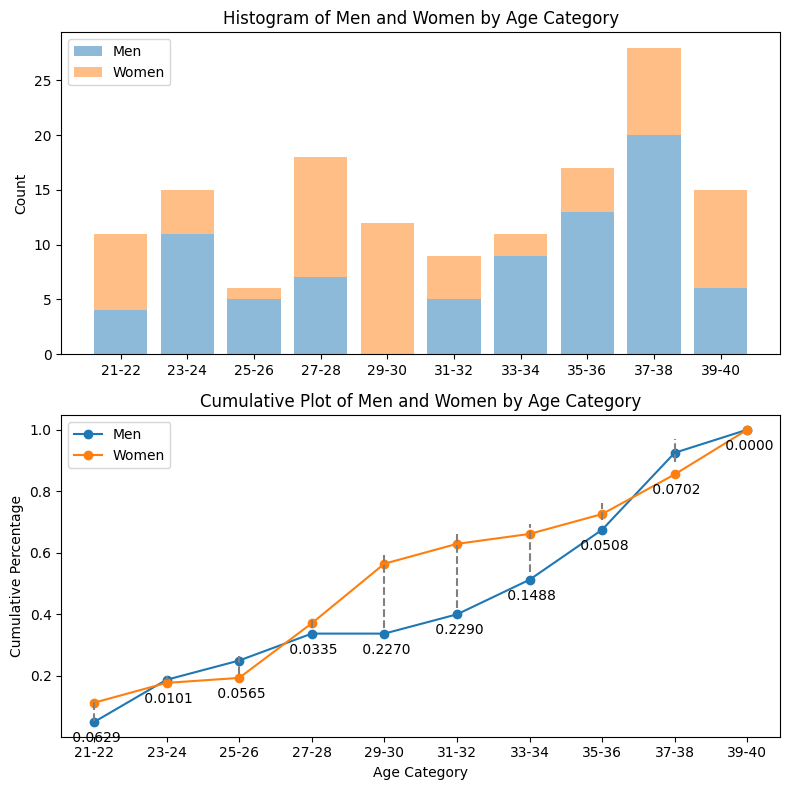

d_value : 0.2290


In [84]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot histograms for men and women on the first subplot (line 1)
ax1.bar(data['Age'], data['Men'], alpha=0.5, label='Men')
ax1.bar(data['Age'], data['Women'], alpha=0.5, label='Women', bottom=data['Men'])
ax1.set_ylabel('Count')
ax1.set_title('Histogram of Men and Women by Age Category')
ax1.legend()

# Plot cumulative line plots for men and women on the second subplot (line 2)
ax2.plot(data['Age'], data['Men_Cumulative_%'], marker='o', label='Men')
ax2.plot(data['Age'], data['Women_Cumulative_%'], marker='o', label='Women')


# Iterate through the data using zip and plot vertical lines and text
for age_category, men_cumulative, women_cumulative, diff in zip(data['Age'], data['Men_Cumulative_%'], data['Women_Cumulative_%'], data['Difference']):
    x = data['Age'].tolist().index(age_category)  # Get the x-position of the age category

    ax2.axvline(x=x, ymin=min(men_cumulative, women_cumulative), ymax=max(men_cumulative, women_cumulative), color='gray', linestyle='--')
    ax2.text(x, min(men_cumulative, women_cumulative) - 0.065, f' {diff:.4f}', rotation=0, ha='center')

ax2.set_xlabel('Age Category')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_title('Cumulative Plot of Men and Women by Age Category')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"d_value : {max(data['Difference']):.4f}")

How to calculate 2 Sample Critical KS Value: https://sparky.rice.edu/astr360/kstest.pdf
<br>Why We want to calculate this?
<br>To be compare with our KS value and get an conclution about whether It has diffrence or not.

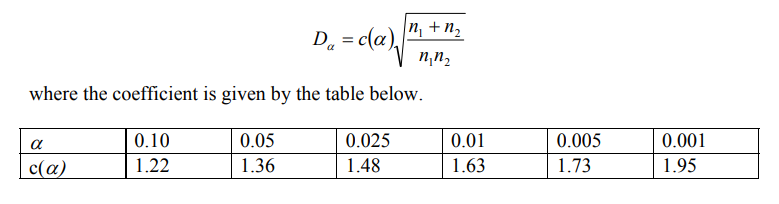

In [86]:
alpha = 0.05 #significance level
m = max(data['Men_Cumulative_N'])   # 80
n = max(data['Women_Cumulative_N']) # 62

c_alpha = 1.36 #for alpha = 0.05
d_crit = c_alpha*(np.sqrt((m+n)/(m*n)))
print( f"d_crit : {d_crit:.4f}")


d_crit : 0.2301


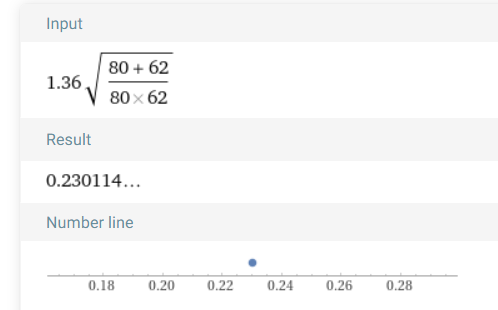

D_Stat = 0.2290 < D_Crit = 0.2301 Therefore we conclude there is no significant difference between the distributions for the samples.